In [ ]:

import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.utils import to_categorical 

2024-05-19 19:54:56.131418: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 19:54:56.131557: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 19:54:56.287194: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


TensorFlow version: 2.15.0


In [ ]:

train_df = pd.read_csv('/social-media-usage-and-emotional-well-being/train.csv', on_bad_lines='skip')
test_df = pd.read_csv('social-media-usage-and-emotional-well-being/test.csv', on_bad_lines='skip')
val_df = pd.read_csv('/social-media-usage-and-emotional-well-being/val.csv', on_bad_lines='skip')
print("First 5 rows of the training data:")
train_df.head()

First 5 rows of the training data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


### 2.2 Understanding the Data

Let's explore the basic structure of the DataFrames to understand the data we are working with. We will look at data types, summary statistics, and check for any missing values.

In [ ]:

print("Information about the training data:")
train_df.info()
print("\nSummary statistics of the training data:")
train_df.describe()
print("\nMissing values in the training data:")
train_df.isnull().sum()

Information about the training data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB

Summary statistics of the training data:

Missing values in the training data:


User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

### 2.3 Preview the Test and Validation Data

Let's also take a quick look at the test and validation datasets to ensure they have similar structures to the training dataset.

In [ ]:
print("First 5 rows of the test data:")
test_df.head()
print("\nMissing values in the test data:")
test_df.isnull().sum()
print("First 5 rows of the validation data:")
val_df.head()
print("\nMissing values in the validation data:")
val_df.isnull().sum()

First 5 rows of the test data:

Missing values in the test data:
First 5 rows of the validation data:

Missing values in the validation data:


User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              1
dtype: int64

In [ ]:

print("First 5 rows of the training data:")
display(train_df.head())

print("\nFirst 5 rows of the test data:")
display(test_df.head())

print("\nFirst 5 rows of the validation data:")
display(val_df.head())

First 5 rows of the training data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom



First 5 rows of the test data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,500,27,Female,Snapchat,120,4,40,18,22,Neutral
1,488,21,Non-binary,Snapchat,60,1,18,7,12,Neutral
2,776,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
3,869,27,Male,Telegram,105,3,48,20,28,Anxiety
4,573,21,Non-binary,Facebook,55,3,17,7,12,Neutral



First 5 rows of the validation data:


,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,10,31,Male,Instagram,170,5,80,20,35,Happiness
1,877,32,Female,Instagram,155,6,75,25,38,Happiness
2,230,26,Non-binary,Facebook,45,1,8,4,12,Sadness
3,876,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety
4,376,28,Non-binary,Snapchat,115,3,38,18,27,Anxiety


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


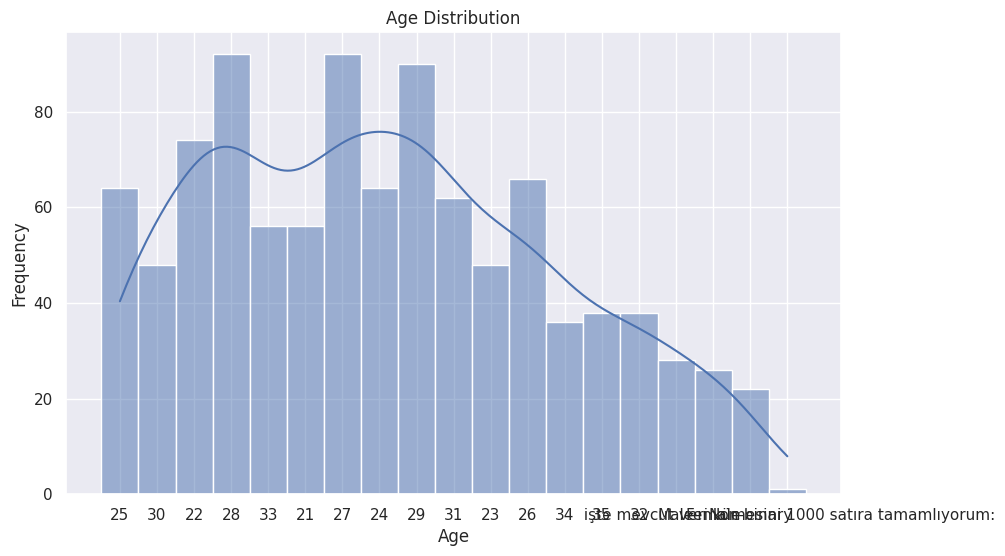

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

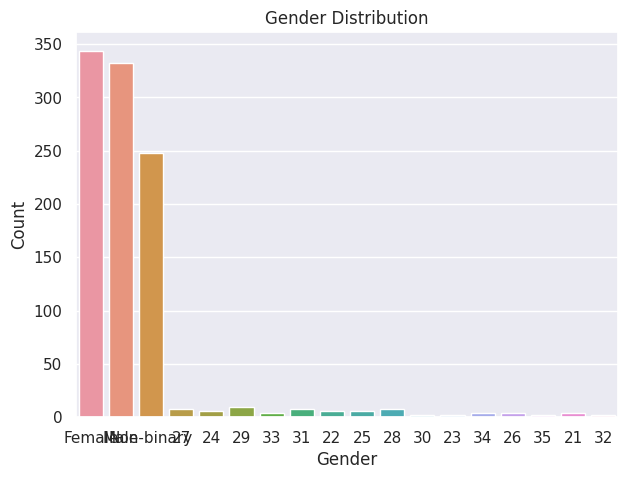

In [7]:
# Plot gender distribution
plt.figure(figsize=(7, 5))
sns.countplot(x='Gender', data=train_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

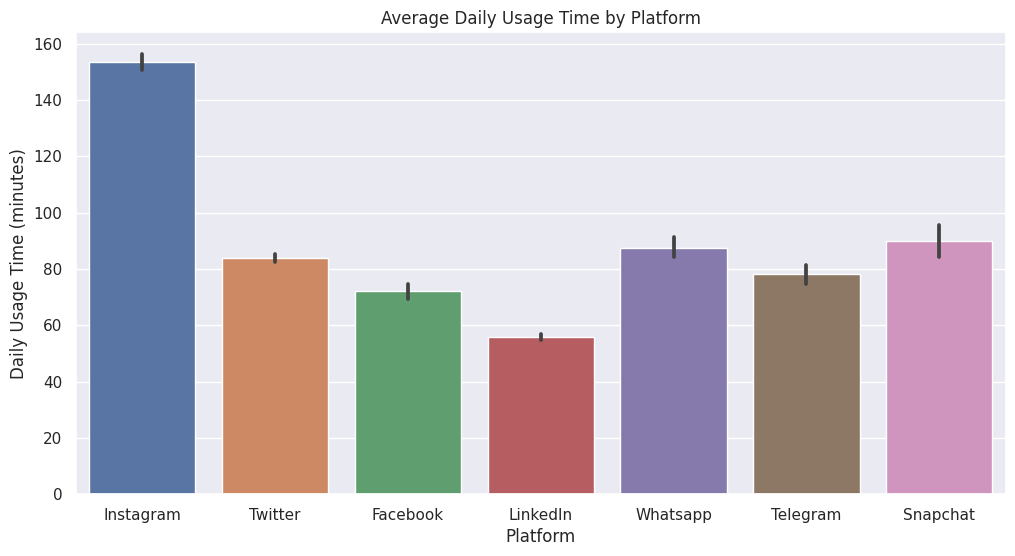

In [8]:
# Plot average daily usage time by platform
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Daily_Usage_Time (minutes)', data=train_df, estimator=np.mean)
plt.title('Average Daily Usage Time by Platform')
plt.xlabel('Platform')
plt.ylabel('Daily Usage Time (minutes)')
plt.show()

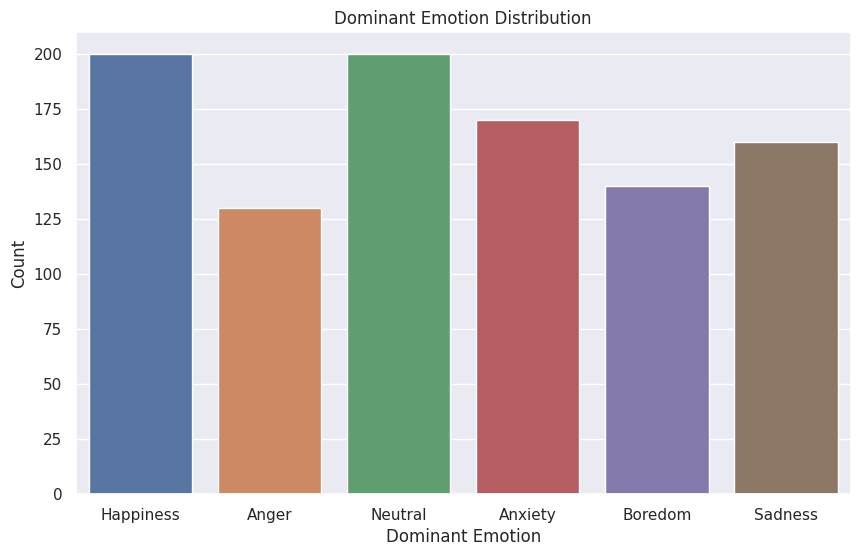

In [9]:
# Plot dominant emotion distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Dominant_Emotion', data=train_df)
plt.title('Dominant Emotion Distribution')
plt.xlabel('Dominant Emotion')
plt.ylabel('Count')
plt.show()

In [ ]:

print("Missing values in training data:")
print(train_df.isnull().sum())
print("\nMissing values in test data:")
print(test_df.isnull().sum())
print("\nMissing values in validation data:")
print(val_df.isnull().sum())
train_df = train_df.dropna()
test_df = test_df.dropna()
val_df = val_df.dropna()
print("\nMissing values in training data after dropping rows with missing values:")
print(train_df.isnull().sum())

Missing values in training data:
User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

Missing values in test data:
User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

Missing values in validation data:
User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Re

In [ ]:

train_df = pd.get_dummies(train_df, columns=['Gender', 'Platform'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Gender', 'Platform'], drop_first=True)
val_df = pd.get_dummies(val_df, columns=['Gender', 'Platform'], drop_first=True)

missing_cols_test = set(train_df.columns) - set(test_df.columns)
for col in missing_cols_test:
    test_df[col] = 0
test_df = test_df[train_df.columns]

missing_cols_val = set(train_df.columns) - set(val_df.columns)
for col in missing_cols_val:
    val_df[col] = 0
val_df = val_df[train_df.columns]

print("Columns in training data:", train_df.columns)
print("\nColumns in test data after encoding and alignment:", test_df.columns)
print("\nColumns in validation data after encoding and alignment:", val_df.columns)

Columns in training data: Index(['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Gender_22', 'Gender_23',
       'Gender_24', 'Gender_25', 'Gender_26', 'Gender_27', 'Gender_28',
       'Gender_29', 'Gender_30', 'Gender_31', 'Gender_32', 'Gender_33',
       'Gender_34', 'Gender_35', 'Gender_Female', 'Gender_Male',
       'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn',
       'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter',
       'Platform_Whatsapp'],
      dtype='object')

Columns in test data after encoding and alignment: Index(['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Gender_22', 'Gender_23',
       'Gender_24', 'Gender_25', 'Gender_26', 'Gender_27', 'Gender_28',
       'Gender_29', 'Gende

In [ ]:

all_labels = list(train_df['Dominant_Emotion']) + list(test_df['Dominant_Emotion']) + list(val_df['Dominant_Emotion'])
label_encoder.fit(all_labels)
y_train_encoded = label_encoder.transform(train_df['Dominant_Emotion'])
y_test_encoded = label_encoder.transform(test_df['Dominant_Emotion'])
y_val_encoded = label_encoder.transform(val_df['Dominant_Emotion'])
X_train = train_df.drop('Dominant_Emotion', axis=1)
X_test = test_df.drop('Dominant_Emotion', axis=1)
X_val = val_df.drop('Dominant_Emotion', axis=1)
print("Feature names in train data:", X_train.columns.tolist())
print("Feature names in test data:", X_test.columns.tolist())
print("Feature names in validation data:", X_val.columns.tolist())
numeric_columns = X_train.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns in the dataset:", numeric_columns)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])
X_val_scaled = scaler.transform(X_val[numeric_columns])
print("Scaled feature sample (first 5 rows of the training data):")
print(X_train_scaled[:5])

Feature names in train data: ['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_22', 'Gender_23', 'Gender_24', 'Gender_25', 'Gender_26', 'Gender_27', 'Gender_28', 'Gender_29', 'Gender_30', 'Gender_31', 'Gender_32', 'Gender_33', 'Gender_34', 'Gender_35', 'Gender_Female', 'Gender_Male', 'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Snapchat', 'Platform_Telegram', 'Platform_Twitter', 'Platform_Whatsapp']
Feature names in test data: ['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Gender_22', 'Gender_23', 'Gender_24', 'Gender_25', 'Gender_26', 'Gender_27', 'Gender_28', 'Gender_29', 'Gender_30', 'Gender_31', 'Gender_32', 'Gender_33', 'Gender_34', 'Gender_35', 'Gender_Female', 'Gender_Male', 'Gender_Non-binary', 'Platform_Instagram', 'Platform_LinkedIn', 'Platform_Sn

In [ ]:

y_train_one_hot = to_categorical(y_train_encoded)
y_test_one_hot = to_categorical(y_test_encoded)
y_val_one_hot = to_categorical(y_val_encoded)
X_train_gru = np.expand_dims(X_train_scaled, axis=1)
X_test_gru = np.expand_dims(X_test_scaled, axis=1)
X_val_gru = np.expand_dims(X_val_scaled, axis=1)

print("Shape of X_train for GRU:", X_train_gru.shape)
print("Shape of Y_train for GRU:", y_train_one_hot.shape)

Shape of X_train for GRU: (1000, 1, 5)
Shape of Y_train for GRU: (1000, 7)


In [ ]:

@tf.function
def custom_activation(x):
    tanh = tf.keras.activations.tanh(x)
    relu = tf.keras.activations.relu(x)
    return tanh + relu * 1.5
print("Testing custom activation function with sample input:")
sample_input = np.array([0.5, 1.0, 1.5, 2.0])
print(custom_activation(sample_input))

Testing custom activation function with sample input:
tf.Tensor([1.21211716 2.26159416 3.15514825 3.96402758], shape=(4,), dtype=float64)


In [ ]:

tf.keras.backend.clear_session()
model = Sequential()
model.add(GRU(32, activation="relu", return_sequences=True, input_shape=(1, X_train_gru.shape[2])))
model.add(Dropout(0.2))
model.add(GRU(128, activation=custom_activation, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(64, activation=custom_activation, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation="tanh"))
model.add(Dropout(0.2))
output_classes = y_train_one_hot.shape[1]
model.add(Dense(output_classes, activation='softmax'))
model.summary()
total_params = sum([tf.size(v).numpy() for v in model.trainable_variables])
print("Total trainable parameters: ", total_params)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 32)          │         3,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 1, 128)         │        62,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,511 (412.15 KB)

 Trainable params: 105,511 (412.15 KB)

 Non-trainable params: 0 (0.00 B)

Total trainable parameters:  105511


In [ ]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 32)          │         3,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 1, 128)         │        62,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,511 (412.15 KB)

 Trainable params: 105,511 (412.15 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - accuracy: 0.2918 - loss: 1.8323 - val_accuracy: 0.3125 - val_loss: 1.5525
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3927 - loss: 1.5443 - val_accuracy: 0.3958 - val_loss: 1.4839
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3950 - loss: 1.4439 - val_accuracy: 0.4167 - val_loss: 1.4536
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4363 - loss: 1.4259 - val_accuracy: 0.4444 - val_loss: 1.4350
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4535 - loss: 1.3278 - val_accuracy: 0.4583 - val_loss: 1.4260
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5002 - loss: 1.3205 - val_accuracy: 0.4653 - val_loss: 1.4376
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4713 - loss: 1.3339 - val_accuracy: 0.4375 - val_loss: 1.4306
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5014 - loss: 1.2926 - val_accuracy: 0.4444 - 

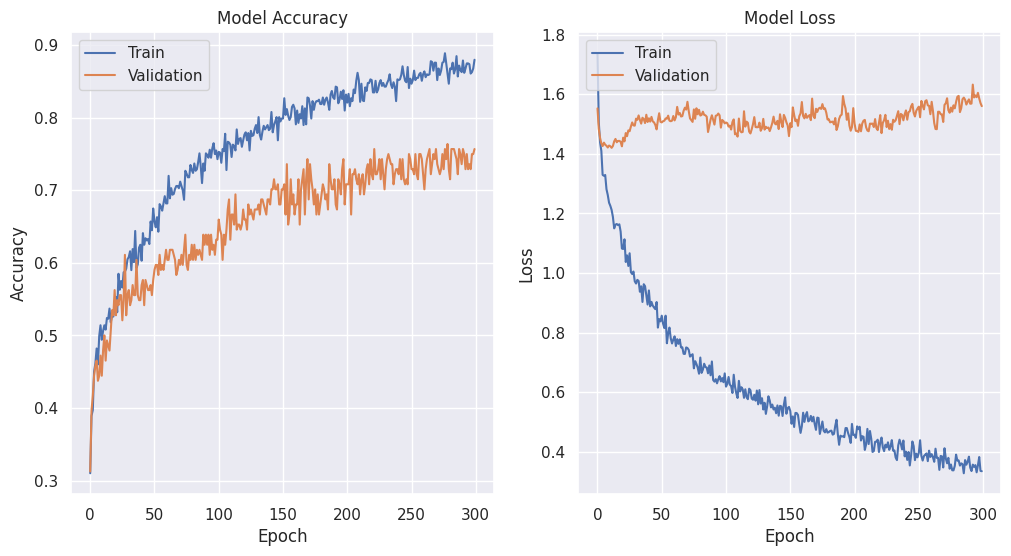

In [ ]:

history = model.fit(X_train_gru, y_train_one_hot, epochs=300, batch_size=32, validation_data=(X_val_gru, y_val_one_hot))

model.save('gru_emotion_model.h5')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step

Classification Report:
              precision    recall  f1-score   support

       Anger       0.82      1.00      0.90         9
     Anxiety       1.00      0.91      0.95        22
     Boredom       0.87      0.81      0.84        16
   Happiness       0.93      1.00      0.97        14
     Neutral       1.00      0.93      0.96        28
     Sadness       0.75      0.86      0.80        14

    accuracy                           0.91       103
   macro avg       0.89      0.92      0.90       103
weighted avg       0.92      0.91      0.91       103



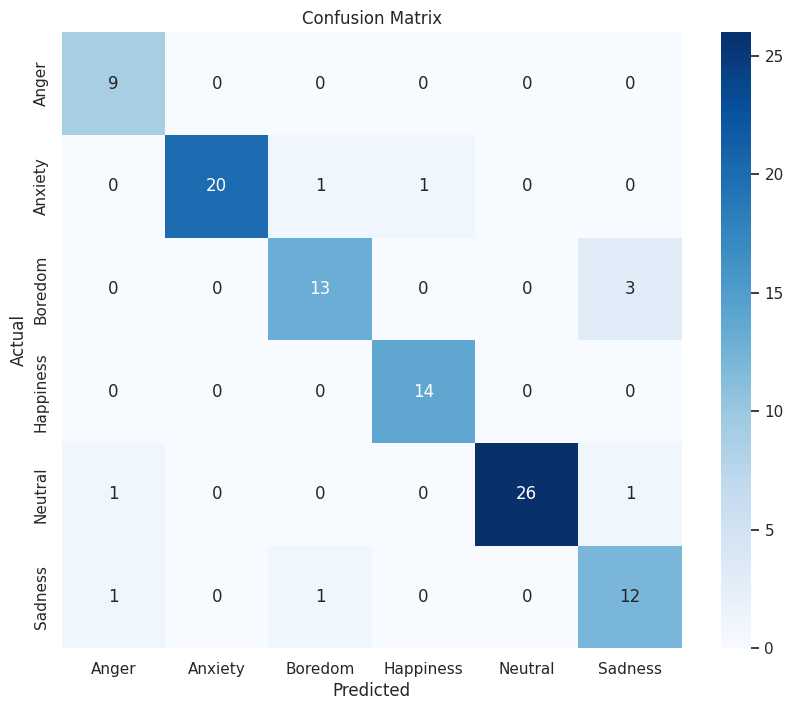

In [ ]:

y_test_pred = model.predict(X_test_gru)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)
y_test_true_classes = np.argmax(y_test_one_hot, axis=1)
unique_labels = np.unique(y_test_true_classes)
unique_label_names = label_encoder.inverse_transform(unique_labels)
print("\nClassification Report:")
print(classification_report(y_test_true_classes, y_test_pred_classes, target_names=unique_label_names))
conf_matrix = confusion_matrix(y_test_true_classes, y_test_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=unique_label_names, yticklabels=unique_label_names, cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()